In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [2]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")
sub = pd.read_csv("submission.csv")

In [4]:
train

,Sipariş Numarası,Sipariş Satırı,Sipariş Tipi,Malzeme Numarası,Sipariş Edilen Miktar,Sku Plt. Standartı,Müşteri No,Sipariş Tarihi
0,72616887,1,Müşteri Siparişleri,61001960,60,228,C-10008,2020-01-02
1,72616888,1,Müşteri Siparişleri,61000066,25,96,C-10185,2020-01-02
2,72616888,2,Müşteri Siparişleri,61001960,50,228,C-10185,2020-01-02
3,72616889,1,Müşteri Siparişleri,61000066,40,96,C-10188,2020-01-02
4,72616889,2,Müşteri Siparişleri,61001960,20,228,C-10188,2020-01-02
...,...,...,...,...,...,...,...,...
276748,72666126,1,Paketli Siparişler,61007050,2376,72,C-10005,2020-12-28
276749,72666165,1,Paketli Siparişler,PL08105A,12012,185,C-10005,2020-12-29
276750,72666166,1,Paketli Siparişler,PL08105A,12210,185,C-10005,2020-12-29
276751,72666197,1,Paketli Siparişler,PL08105A,11837,185,C-10005,2020-12-30


In [5]:
train.isnull().sum()

Sipariş Numarası         0
Sipariş Satırı           0
Sipariş Tipi             0
Malzeme Numarası         0
Sipariş Edilen Miktar    0
Sku Plt. Standartı       0
Müşteri No               0
Sipariş Tarihi           0
dtype: int64

In [6]:
test.head()

,Sipariş Numarası,Sipariş Satırı,Sipariş Tipi,Malzeme Numarası,Sku Plt. Standartı,Müşteri No,Sipariş Tarihi
0,72666244,1,Paketli Siparişler,CN05756A,36,C-10005,2021-01-03
1,72666256,1,Müşteri Siparişleri,TR02237A,160,C-10176,2021-01-04
2,72666257,1,Müşteri Siparişleri,61013510,240,C-10154,2021-01-04
3,72666259,1,Müşteri Siparişleri,61013508,364,C-10160,2021-01-04
4,72666265,1,Müşteri Siparişleri,TR02237A,160,C-10024,2021-01-04


In [7]:
test.isnull().sum()

Sipariş Numarası      0
Sipariş Satırı        0
Sipariş Tipi          0
Malzeme Numarası      0
Sku Plt. Standartı    0
Müşteri No            0
Sipariş Tarihi        0
dtype: int64

In [8]:
train["Sipariş Tipi"].unique()

array(['Müşteri Siparişleri', 'Transfer', 'Paketli Siparişler'],
      dtype=object)

In [9]:
train["Sku Plt. Standartı"].unique()

array([228,  96, 196, 216, 210,  57,  64, 192,  56,  52,  98,  84,  80,
       224, 132, 175,  63, 128,  60,  48, 200, 280, 185, 100,  72,  55,
       225, 320, 120,  54,  36, 108, 245, 300, 168, 250, 161, 650, 342,
        45, 408, 182,  42, 333, 140, 344, 205, 372,  24,  28, 147,  27,
        10, 261, 105,   8,  49, 189,  70, 336,  50, 144, 114,  18, 378,
       125,  30, 520, 504, 270, 364, 288, 310, 312, 305, 180, 297, 112,
       215, 400, 133,  85, 322,  95, 234, 155,   1, 259,  40, 258],
      dtype=int64)

In [10]:
train[train["Sipariş Satırı"]==89]

,Sipariş Numarası,Sipariş Satırı,Sipariş Tipi,Malzeme Numarası,Sipariş Edilen Miktar,Sku Plt. Standartı,Müşteri No,Sipariş Tarihi
146149,72643683,89,Müşteri Siparişleri,61003831,5,60,C-10001,2020-07-13
161840,72646548,89,Müşteri Siparişleri,FCN01816,89,280,C-10096,2020-08-07
217469,72655238,89,Müşteri Siparişleri,TR02287A,1,225,C-10069,2020-10-06
236402,72658847,89,Müşteri Siparişleri,CN01148A,3,132,C-10001,2020-10-31


In [11]:
train["Sipariş Satırı"].unique()

array([   1,    2,    3,    6,    5,    7,    4,   12,   13,   10,   11,
          8,    9,   29,   30,   15,   20,   22,   23,   19,   18,   21,
         16,   14,   17,   25,   28,   26,   27,   24,   31,   36,   32,
         33,   34,   35,   37,   42,   39,   53,   52,   43,   41,   38,
         51,   56,   40,   50,   45,   57,   54,   55,   48,   49,   46,
         47,   44,   59,   63,   60,   58,   62,   65,   61,   64,   66,
         76,   67,   69,   68,   70,   72,   71,   73,   74,   75,   79,
         77,   78,   80,   82,   81,   84,   83,   85,   87,   88,   86,
         89,   91,   92,   90,   94,   93, 9999], dtype=int64)

In [12]:
train['order_weekday'] =  pd.to_datetime(train['Sipariş Tarihi']).dt.weekday
train['order_month'] = pd.to_datetime(train['Sipariş Tarihi']).dt.month
train['order_day'] = pd.to_datetime(train['Sipariş Tarihi']).dt.day

In [13]:
train['Sipariş Satırı'] = train['Sipariş Satırı'].replace(9999, np.nan)
train.dropna(inplace=True)

In [14]:
order_returns = pd.DataFrame(train.groupby(['Sipariş Numarası'])['Sipariş Satırı'].max()).reset_index()

In [15]:
train = pd.merge(train, order_returns, on=['Sipariş Numarası'], how='left')

In [16]:
train = train.rename(columns={'Sipariş Satırı_y': 'Sipariş Toplamı','Sipariş Satırı_x':'Sipariş Satırı'})

In [17]:
sip_df = train[['Müşteri No','Sipariş Numarası','Sipariş Toplamı']].copy()
sip_df['tail'] = sip_df.groupby(['Müşteri No','Sipariş Numarası'])['Sipariş Toplamı'].tail(1)

In [18]:
sip_df['shifted_sipariş_toplamı'] = sip_df.groupby(['Müşteri No'])['tail'].shift(1)

In [19]:
sip_df['shifted_sipariş_toplamı'].fillna(0.0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
274874    3.0
274875    1.0
274876    1.0
274877    1.0
274878    1.0
Name: shifted_sipariş_toplamı, Length: 274879, dtype: float64

In [20]:
sip_df

,Müşteri No,Sipariş Numarası,Sipariş Toplamı,tail,shifted_sipariş_toplamı
0,C-10008,72616887,1.0,1.0,NaN
1,C-10185,72616888,2.0,NaN,NaN
2,C-10185,72616888,2.0,2.0,NaN
3,C-10188,72616889,3.0,NaN,NaN
4,C-10188,72616889,3.0,NaN,NaN
...,...,...,...,...,...
274874,C-10005,72666126,1.0,1.0,3.0
274875,C-10005,72666165,1.0,1.0,1.0
274876,C-10005,72666166,1.0,1.0,1.0
274877,C-10005,72666197,1.0,1.0,1.0


In [21]:
sip_df.drop(columns=["Sipariş Toplamı","tail"],inplace=True)

In [22]:
sip_df.dropna(subset=["shifted_sipariş_toplamı"],inplace=True)

In [23]:
sip_df.tail(20)

,Müşteri No,Sipariş Numarası,shifted_sipariş_toplamı
274852,C-10005,72666039,1.0
274853,C-10005,72666051,1.0
274855,C-10005,72666052,2.0
274857,C-10005,72666053,2.0
274858,C-10005,72666054,1.0
274859,C-10005,72666055,1.0
274860,C-10005,72666056,1.0
274861,C-10005,72666057,1.0
274863,C-10005,72666058,2.0
274864,C-10005,72666059,1.0


In [24]:
train = pd.merge(train, sip_df, on=['Müşteri No','Sipariş Numarası'], how='left')

In [25]:
train.dropna(subset=["shifted_sipariş_toplamı"],inplace=True)

In [29]:
train['Müşteri No'].unique()

array(['C-10198', 'C-10008', 'C-10085', 'C-10189', 'C-10023', 'C-10007',
       'C-10040', 'C-10017', 'C-10065', 'C-10109', 'C-10134', 'C-10010',
       'C-10159', 'C-10036', 'C-10124', 'C-10011', 'C-10199', 'C-10175',
       'C-10077', 'C-10163', 'C-10047', 'C-10025', 'C-10037', 'C-10045',
       'C-10139', 'C-10046', 'C-10004', 'C-10133', 'C-10009', 'C-10050',
       'C-10038', 'C-10087', 'C-10028', 'C-10012', 'C-10042', 'C-10013',
       'C-10003', 'C-10006', 'C-10035', 'C-10138', 'C-10090', 'C-10016',
       'C-10031', 'C-10032', 'C-10041', 'C-10043', 'C-10071', 'C-10123',
       'C-10131', 'C-10020', 'C-10021', 'C-10015', 'C-10137', 'C-10014',
       'C-10019', 'C-10018', 'C-10001', 'C-10029', 'C-10078', 'C-10005',
       'C-10221', 'C-10030', 'C-10070', 'C-10067', 'C-10060', 'C-10057',
       'C-10075', 'C-10058', 'C-10054', 'C-10211', 'C-10056', 'C-10072',
       'C-10110', 'C-10089', 'C-10105', 'C-10053', 'C-10059', 'C-10082',
       'C-10063', 'C-10197', 'C-10091', 'C-10185', 

In [30]:
label = ['Sipariş Edilen Miktar']

categorical_str = [
'Sipariş Tipi',
'Müşteri No',
'Malzeme Numarası'
] 

categorical_int = [
'Sku Plt. Standartı',
'order_month',
'order_weekday',
'order_day'
]

numerical = [
'Sipariş Toplamı',
'Sipariş Satırı',
'shifted_sipariş_toplamı'
]

drops = [
'Sipariş Numarası',
'Sipariş Tarihi']

In [31]:
merged_train = train[categorical_str+categorical_int+numerical+label]

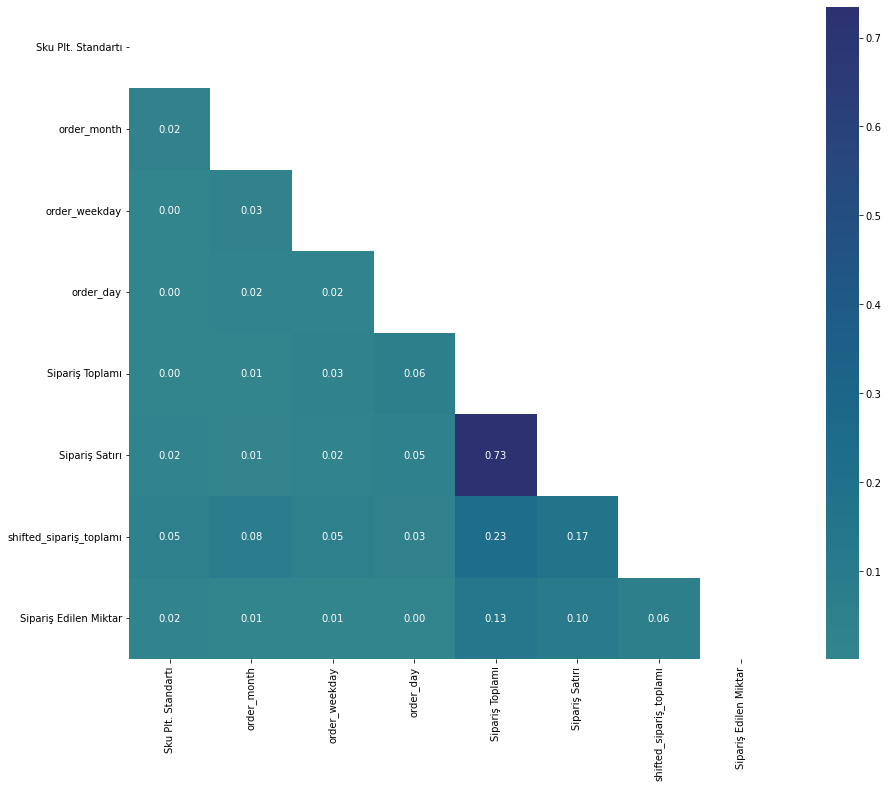

In [32]:
matrix = merged_train.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [33]:
def create_pipeline_rf():
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    

    categorical_str_transformer = Pipeline(steps=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    categorical_int_transformer = Pipeline(steps=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  
                                                  ('cat_str1', categorical_str_transformer, categorical_str),
                                                  
                                                  ('cat_int1', categorical_int_transformer, categorical_int),
                                                  ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor',XGBRegressor(gamma = 0.05, learning_rate= 0.1, max_depth=5,
                                                     n_estimators= 1000, n_jobs= 8, objective= 'reg:squarederror',
                                                     reg_alpha= 0.5, reg_lambda= 1, scale_pos_weight=1, subsample= 1.0))])
    
    return pipeline

In [34]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [35]:
y = merged_train['Sipariş Edilen Miktar']
X = merged_train[categorical_str+categorical_int+numerical]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

pipe1 = create_pipeline_rf()
pipe1.fit(X_train, y_train)
preds = pipe1.predict(X_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_validate(pipe1, X, y, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1, 
                        return_estimator=True, return_train_score=True, cv=cv)

print("R2 score:{}, RMSE:{}".format(np.mean(scores["test_r2"]),np.mean(np.sqrt(-scores['test_neg_mean_squared_error']))))

C:\Users\Salih\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


R2 score:0.6806589761359918, RMSE:76.23160684012086


In [36]:
aa

NameError: name 'aa' is not defined

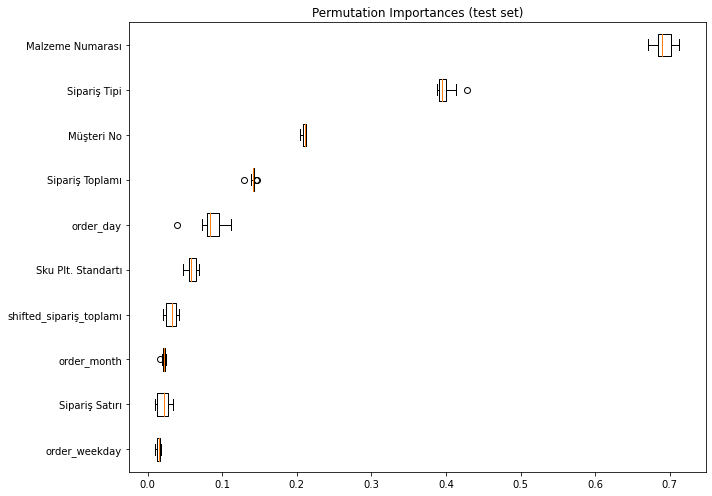

In [61]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipe1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
import phik
phik_overview = merged_train.phik_matrix()

matrix = phik_overview.abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(18, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='Dark2_r')

plt.show();

In [ ]:
sampled_data = merged_train.sample(n=50000, random_state=1)

In [ ]:
sampled_data

In [ ]:
def create_pipeline(reg_name, reg_object):
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    

    categorical_str_transformer = Pipeline(steps=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    categorical_int_transformer = Pipeline(steps=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  
                                                  ('cat_str1', categorical_str_transformer, categorical_str),
                                                  
                                                  ('cat_int1', categorical_int_transformer, categorical_int),
                                                  ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          (reg_name, reg_object)])
    
    return pipeline

In [ ]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "LinearSVR": LinearSVR(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge()
}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])
y = sampled_data['Sipariş Edilen Miktar']
X = sampled_data[categorical_str+categorical_int+numerical]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
for value, key in regressors.items():

    print('*',value, key)

    start_time = time.time()
    
    
    pipe2 = create_pipeline(value,key)
    pipe2.fit(X_train, y_train)
    y_pred = pipe2.predict(X_test)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_validate(pipe2, X, y, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1, 
                        return_estimator=True, return_train_score=True, cv=cv)
    """scores = cross_val_score(pipe2, 
                             X_train, 
                             y_train,
                             scoring="neg_root_mean_squared_error", 
                             cv=5)"""

 

    row = {'model': key,
           'run_time': format(scores['fit_time']),
           'train_r2': scores['train_r2'],
           'test_r2': scores['test_r2'],
           'rmse': scores['test_neg_mean_squared_error'],
           'rmse_cv': np.mean(np.sqrt(-scores['test_neg_mean_squared_error']))
    }

    df_models = df_models.append(row, ignore_index=True)

In [ ]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

#### Hyperparameter Tuning for XGBRegressor

In [ ]:
pipe1[1].get_params()

In [ ]:
param_grid = dict(
    n_jobs=[8],
    learning_rate=[0.1, 0.5],
    objective=['reg:squarederror'],
    max_depth=[5, 10, 15], 
    n_estimators=[100, 500, 1000],
    subsample=[0.2, 0.8, 1.0],
    gamma=[0.05, 0.5],
    scale_pos_weight=[0, 1],
    reg_alpha=[0, 0.5],
    reg_lambda=[1, 0],
)

In [ ]:
def prepare_param_grid(params):
    
    param_grid = {}
    for key, value in params.items():
        new_key = 'regressor__' + key 
        param_grid[new_key] = value
    return param_grid

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(estimator=pipe1,
                           param_grid=prepare_param_grid(param_grid),
                           scoring='neg_root_mean_squared_error', n_jobs=-1
                           )

best_model = halving_grid_search.fit(X_train, y_train)
print('Optimum parameters', best_model.best_params_)

## Test

In [37]:
test['order_weekday'] =  pd.to_datetime(test['Sipariş Tarihi']).dt.weekday
test['order_month'] = pd.to_datetime(test['Sipariş Tarihi']).dt.month
test['order_day'] = pd.to_datetime(test['Sipariş Tarihi']).dt.day

In [38]:
test['Sipariş Satırı'] = test['Sipariş Satırı'].replace(9999, np.nan)
test.dropna(inplace=True)

In [39]:
order_returns = pd.DataFrame(test.groupby(['Sipariş Numarası'])['Sipariş Satırı'].max()).reset_index()
test = pd.merge(test, order_returns, on=['Sipariş Numarası'], how='left')
test = test.rename(columns={'Sipariş Satırı_y': 'Sipariş Toplamı','Sipariş Satırı_x':'Sipariş Satırı'})

In [40]:
sip_df = test[['Müşteri No','Sipariş Numarası','Sipariş Toplamı']].copy()
sip_df['tail'] = sip_df.groupby(['Müşteri No','Sipariş Numarası'])['Sipariş Toplamı'].tail(1)
sip_df['shifted_sipariş_toplamı'] = sip_df.groupby(['Müşteri No'])['tail'].shift(1)
sip_df['shifted_sipariş_toplamı'].fillna(0.0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
46587     0.0
46588    15.0
46589     0.0
46590    16.0
46591     0.0
Name: shifted_sipariş_toplamı, Length: 46592, dtype: float64

In [41]:
sip_df.drop(columns=["Sipariş Toplamı","tail"],inplace=True)
sip_df.dropna(subset=["shifted_sipariş_toplamı"],inplace=True)

In [42]:
test = pd.merge(test, sip_df, on=['Müşteri No','Sipariş Numarası'], how='left')
test.dropna(subset=["shifted_sipariş_toplamı"],inplace=True)

In [47]:
merged_test = test[categorical_str+categorical_int+numerical]

In [45]:
def create_pipeline_test():
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    

    categorical_str_transformer = Pipeline(steps=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    categorical_int_transformer = Pipeline(steps=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  
                                                  ('cat_str1', categorical_str_transformer, categorical_str),
                                                  
                                                  ('cat_int1', categorical_int_transformer, categorical_int),
                                                  ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor',XGBRegressor(gamma = 0.05, learning_rate= 0.1, max_depth=5,
                                                     n_estimators= 1000, n_jobs= 8, objective= 'reg:squarederror',
                                                     reg_alpha= 0.5, reg_lambda= 1, scale_pos_weight=1, subsample= 1.0))])
    
    return pipeline

In [46]:
y = merged_train['Sipariş Edilen Miktar']
X = merged_train[categorical_str+categorical_int+numerical]

pipe1 = create_pipeline_test()
pipe1.fit(X, y)
preds = pipe1.predict(merged_test)

print(preds)

[ 33.35295   112.71699    59.781082  ...   1.289927    4.1898046
   2.9065795]


In [60]:
pd.DataFrame(preds)

,0
0,33.0
1,113.0
2,60.0
3,34.0
4,54.0
...,...
73358,1.0
73359,3.0
73360,1.0
73361,4.0
